In [31]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

from scipy.stats import randint, uniform, loguniform

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [32]:
random.seed(1)

data_dir = './GSE61260/'

In [33]:
df = pd.read_csv(os.path.join(data_dir, 'combined.csv'))

df.head()

,Sample_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,Disease,characteristics_ch1_bmi
0,GSM1501013,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,...,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,normal control,27.1
1,GSM1501014,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,...,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,healthy obese,30.5
2,GSM1501015,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,...,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,normal control,25.3
3,GSM1501016,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,...,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,normal control,25.8
4,GSM1501017,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,...,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,normal control,23.5


In [34]:
le = LabelEncoder()

y = le.fit_transform(df['Disease'])

X = df.drop(columns = ['Sample_ID', 'Disease'])
X.head()



,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283787,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,characteristics_ch1_bmi
0,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,3.010408,...,-0.246719,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,27.1
1,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,3.464364,...,0.040158,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,30.5
2,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,2.829070,...,-0.248596,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,25.3
3,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,2.733645,...,-0.086860,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,25.8
4,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,2.708227,...,0.337941,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,23.5


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)

(106, 21662)
(27, 21662)



Defined Pipeline:
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(class_weight='balanced', random_state=42))])

Starting RandomizedSearchCV on Pipeline...


c:\Users\jaydn\Documents\Projects\Human-Liver-RNA-Seq-Gene-Expression-Analysis\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV on Pipeline complete.

Best hyperparameters found for the pipeline:
{'classifier__kernel': 'linear', 'classifier__C': np.float64(0.001)}

Best cross-validation score:
0.5451269365555079

Best Pipeline Model:
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 SVC(C=np.float64(0.001), class_weight='balanced',
                     kernel='linear', random_state=42))])

--- Evaluation of Best Tuned Pipeline on Test Set ---
Accuracy: 0.7778

Classification Report:
                precision    recall  f1-score   support

 healthy obese       0.60      0.60      0.60         5
         nafld       0.60      0.60      0.60         5
          nash       1.00      0.50      0.67         4
normal control       0.80      1.00      0.89         8
           pbc       1.00      1.00      1.00         2
           psc       1.00      1.00      1.00         3

      accuracy                           0.78        27
     macro avg       0.83

<Axes: >

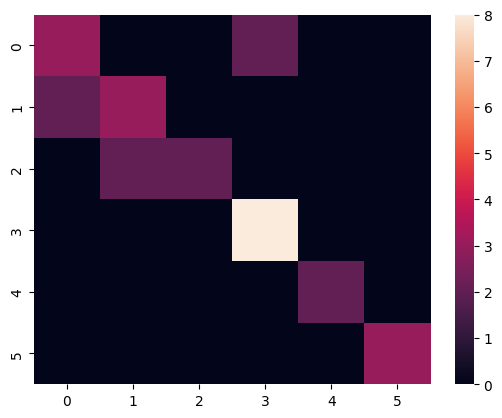

In [36]:
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42, class_weight='balanced')) 
]
pipeline = ImbPipeline(pipeline_steps)
print("\nDefined Pipeline:")
print(pipeline)

param_dist = [
    {
        'classifier__kernel': ['linear'],
        'classifier__C': np.logspace(-3, 3, 5),
    },
    
    {
        'classifier__kernel': ['rbf'],
        'classifier__C': np.logspace(-3, 3, 5),
        'classifier__gamma': np.logspace(-3, 3, 5),
    },
]

random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline,                
    param_distributions=param_dist,  
    n_iter=50,                        
    cv=5,                            
    scoring='f1_weighted',             
    verbose=0,                         
    random_state=1,                   
    n_jobs=-1                          
)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


best_scaler = best_pipeline_model.named_steps['scaler']
best_classifier = best_pipeline_model.named_steps['classifier']

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)


--- Top 20 Most Relevant Features ---
               feature  importance
19452  ENSG00000229140    0.001218
2482   ENSG00000101638    0.001184
11222  ENSG00000165807    0.001183
16960  ENSG00000199934    0.001177
5803   ENSG00000128310    0.001176
1652   ENSG00000086506    0.001175
14506  ENSG00000182632    0.001168
19110  ENSG00000222806    0.001151
1493   ENSG00000081177    0.001149
15290  ENSG00000186306    0.001129
13108  ENSG00000174576    0.001129
6600   ENSG00000134216    0.001122
5270   ENSG00000124134    0.001117
14797  ENSG00000184058    0.001115
12567  ENSG00000171772    0.001115
1980   ENSG00000095587    0.001106
14281  ENSG00000181418    0.001100
18577  ENSG00000212601    0.001100
19837  ENSG00000237048    0.001100
2972   ENSG00000105278    0.001095


<Axes: xlabel='importance', ylabel='feature'>

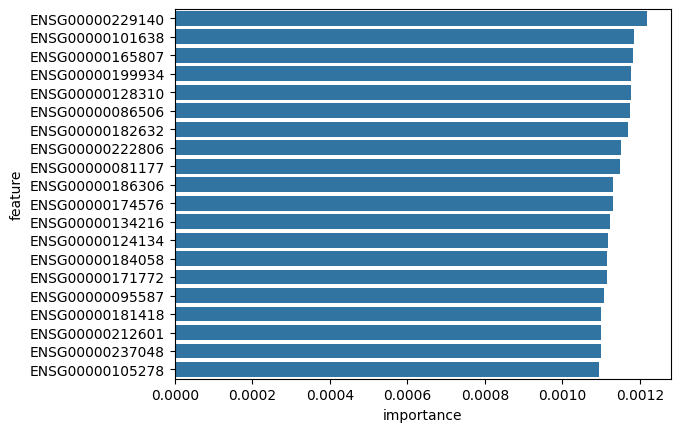

In [37]:
importances = np.abs(best_classifier.coef_[0])

feature_names = X_train.columns.tolist()

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\n--- Top 20 Most Relevant Features ---")
print(feature_importance_df.head(20))

sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))


Defined Pipeline:
Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device='cuda',
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               mi

c:\Users\jaydn\Documents\Projects\Human-Liver-RNA-Seq-Gene-Expression-Analysis\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:03:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV on Pipeline complete.

Best hyperparameters found for the pipeline:
{'classifier__class_weight': None, 'classifier__colsample_bytree': np.float64(0.8982714934301164), 'classifier__eval_metric': 'mlogloss', 'classifier__gamma': np.float64(2.934123021513229e-08), 'classifier__learning_rate': np.float64(0.03625617634576228), 'classifier__max_depth': 1, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 221, 'classifier__objective': 'multi:softmax', 'classifier__reg_alpha': np.float64(1.7699302940633323e-08), 'classifier__reg_lambda': np.float64(2.9152036385288267e-09), 'classifier__subsample': np.float64(0.9464704583099741), 'classifier__use_label_encoder': False}

Best cross-validation score:
0.677079957079957

Best Pipeline Model:
Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               class_we

c:\Users\jaydn\Documents\Projects\Human-Liver-RNA-Seq-Gene-Expression-Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jaydn\Documents\Projects\Human-Liver-RNA-Seq-Gene-Expression-Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jaydn\Documents\Projects\Human-Liver-RNA-Seq-Gene-Expression-Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

<Axes: >

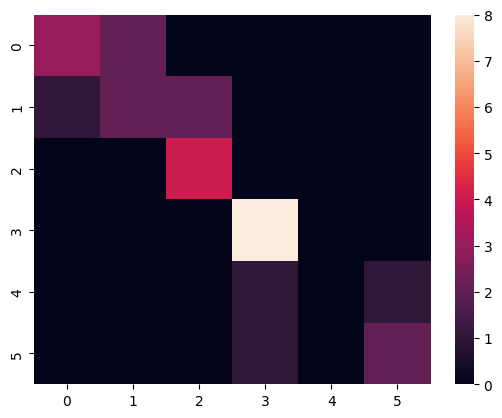

In [38]:
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, device='cuda', enable_categorical=False))
]
pipeline = ImbPipeline(pipeline_steps)
print("\nDefined Pipeline:")
print(pipeline)

param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__learning_rate': loguniform(0.001, 0.1),
    'classifier__max_depth': randint(1, 4),
    
    'classifier__colsample_bytree': uniform(0.5, 0.5), 
    
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__gamma': loguniform(1e-9, 1e-1),
    'classifier__min_child_weight': randint(1, 5),
    'classifier__reg_alpha': loguniform(1e-9, 1e-1),
    'classifier__reg_lambda': loguniform(1e-9, 1e-1),

    'classifier__objective': ['multi:softmax'],
    'classifier__eval_metric': ['mlogloss'],
    'classifier__use_label_encoder': [False],
    'classifier__class_weight': [None, 'balanced']
}

# Initialize RandomizedSearchCV
random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline,                
    param_distributions=param_dist,  
    n_iter=1,                   
    cv=5,                         
    scoring='f1_weighted',         
    verbose=0,                         
    random_state=42,                   
    n_jobs=6                          
)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


best_scaler = best_pipeline_model.named_steps['scaler']
best_classifier = best_pipeline_model.named_steps['classifier']

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)



--- Top 20 Most Relevant Features ---
               feature  importance
754    ENSG00000057593    0.030820
3998   ENSG00000113119    0.029097
3875   ENSG00000112183    0.027416
7812   ENSG00000141448    0.024894
18009  ENSG00000206561    0.022462
7954   ENSG00000142627    0.022450
16197  ENSG00000197061    0.021346
11393  ENSG00000166483    0.019912
6420   ENSG00000132837    0.018820
8057   ENSG00000143341    0.017908
9761   ENSG00000157992    0.017746
20957  ENSG00000257093    0.017490
15680  ENSG00000188352    0.017191
15642  ENSG00000188157    0.016639
19628  ENSG00000233247    0.014473
18988  ENSG00000222259    0.013709
8164   ENSG00000143850    0.013176
10005  ENSG00000160097    0.013147
16231  ENSG00000197170    0.012978
3620   ENSG00000110104    0.012585


<Axes: xlabel='importance', ylabel='feature'>

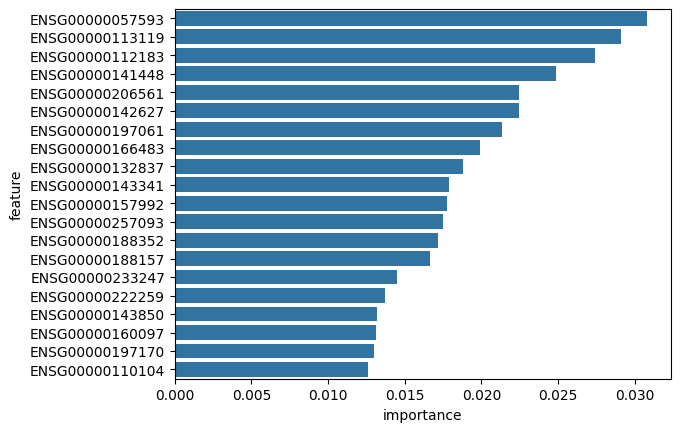

In [39]:
best_classifier = best_pipeline_model.named_steps['classifier']
importances = best_classifier.feature_importances_

feature_names = X_train.columns.tolist()

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\n--- Top 20 Most Relevant Features ---")
print(feature_importance_df.head(20))

sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))


Starting RandomizedSearchCV on Pipeline...
RandomizedSearchCV on Pipeline complete.

Best hyperparameters found for the pipeline:
{'classifier__n_estimators': 1000, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 10, 'classifier__max_features': 0.05, 'classifier__max_depth': None, 'classifier__bootstrap': True}

Best cross-validation score:
0.624923186481628

Best Pipeline Model:
Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_features=0.05, min_samples_leaf=10,
                                        n_estimators=1000, random_state=42))])

--- Evaluation of Best Tuned Pipeline on Test Set ---
Accuracy: 0.7407

Classification Report:
                precision    recall  f1-score   support

 healthy obese       0.83      1.00      0.91         5
         nafld       0.60      0.60      0.60         5
          nash       0.67      0.50      0.57         4
norm

<Axes: >

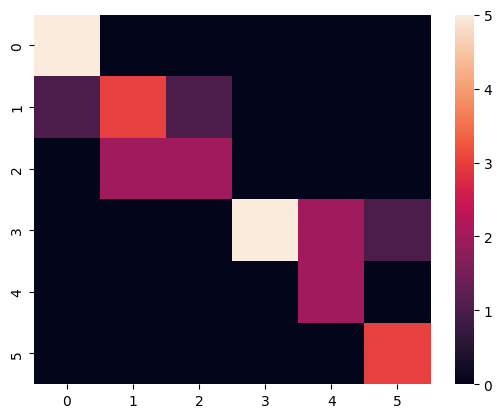

In [40]:
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
]
pipeline = ImbPipeline(pipeline_steps)

param_dist = {

    'classifier__n_estimators': [100, 250, 500, 1000],

    'classifier__max_features': ['sqrt', 'log2', 0.05, 0.1], 
    
    'classifier__max_depth': [3, 5, 10, 15, 20, None],

    'classifier__min_samples_split': [2, 5, 10, 20],

    'classifier__min_samples_leaf': [1, 2, 5, 10],

    'classifier__bootstrap': [True] 
}
  
random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline, 
    param_distributions=param_dist,
    scoring='f1_weighted',  
    n_iter=5, 
    cv=5, 
    verbose=0, 
    random_state=42, 
    n_jobs=-1)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


best_scaler = best_pipeline_model.named_steps['scaler']
best_classifier = best_pipeline_model.named_steps['classifier']

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)


--- Top 20 Most Relevant Features ---
                       feature  importance
21661  characteristics_ch1_bmi    0.020347
754            ENSG00000057593    0.012462
7812           ENSG00000141448    0.012356
7954           ENSG00000142627    0.010896
8267           ENSG00000144597    0.010046
17593          ENSG00000203875    0.009713
3875           ENSG00000112183    0.009344
20957          ENSG00000257093    0.009179
5225           ENSG00000123609    0.008418
8023           ENSG00000143183    0.007656
11393          ENSG00000166483    0.006365
13468          ENSG00000176624    0.005865
15949          ENSG00000196177    0.005270
19628          ENSG00000233247    0.005162
1070           ENSG00000070061    0.004890
10220          ENSG00000161904    0.004734
8747           ENSG00000148426    0.004574
8064           ENSG00000143368    0.004539
11564          ENSG00000167220    0.004436
3187           ENSG00000106355    0.004333


<Axes: xlabel='importance', ylabel='feature'>

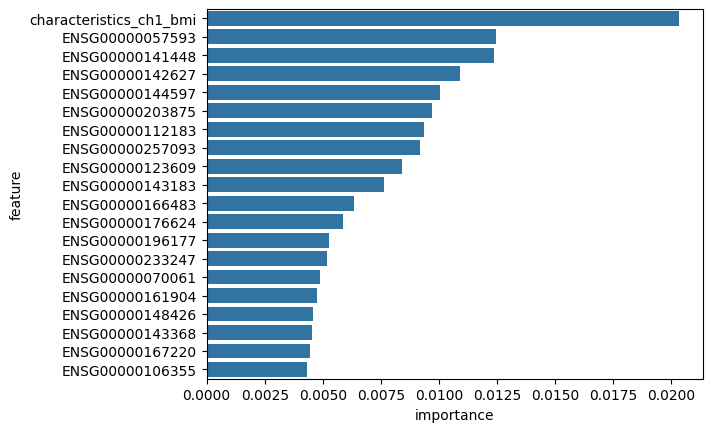

In [41]:
best_classifier = best_pipeline_model.named_steps['classifier']
importances = best_classifier.feature_importances_

feature_names = X_train.columns.tolist()

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\n--- Top 20 Most Relevant Features ---")
print(feature_importance_df.head(20))

sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))